<a href="https://colab.research.google.com/drive/1tElT3FhddabqCyJKFH27rhnyXJTqrzke?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`


Train the `KNeighborsClassifier` on the dataset.

In [33]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('assets/forest_dataset.csv')
all_data.head()

clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='uniform')

X = all_data.iloc[:, :-1]
y = all_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN Classifier: {accuracy * 100:.2f}%')


Accuracy of KNN Classifier: 73.65%


Let's select the parameters of our model:

* Iterate over the grid from `1` to `10` for the number of neighbors parameter
* Also, try using different metrics: `['manhattan', 'euclidean']`
* Try using different weight calculation strategies: `[‘uniform’, ‘distance’]`

In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': list(range(1, 11)),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
}
clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(X_train, y_train)

best_params = clf_grid.best_params_
best_model = clf_grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Best KNN Model: {accuracy * 100:.2f}%')


Accuracy of Best KNN Model: 78.50%


Let's output the best parameters

In [29]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [30]:
optimal_clf = clf_grid.best_estimator_
y_pred = optimal_clf.predict(X_test)
pred_prob = optimal_clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)

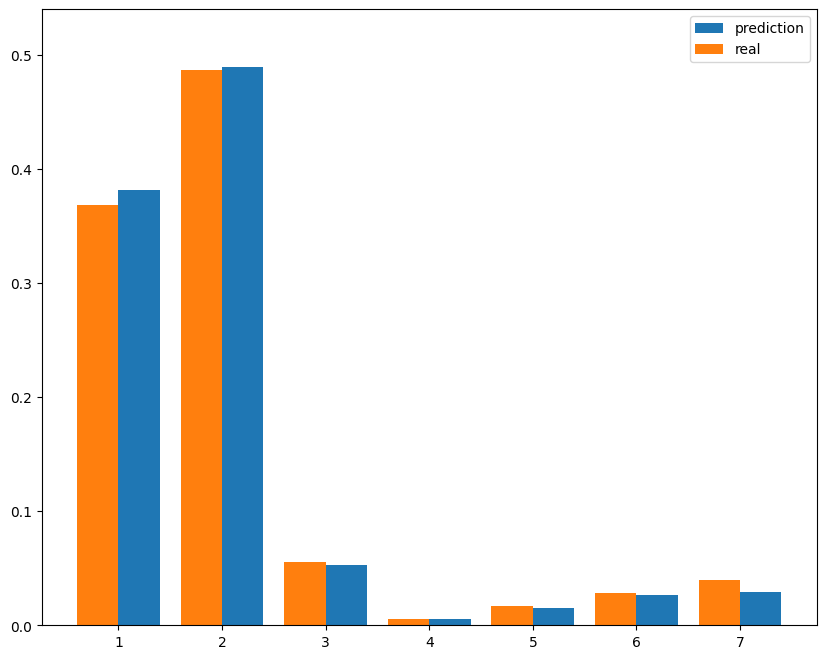

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(y_test, return_counts=True)
freq = list(map(lambda x: x / len(y_test),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

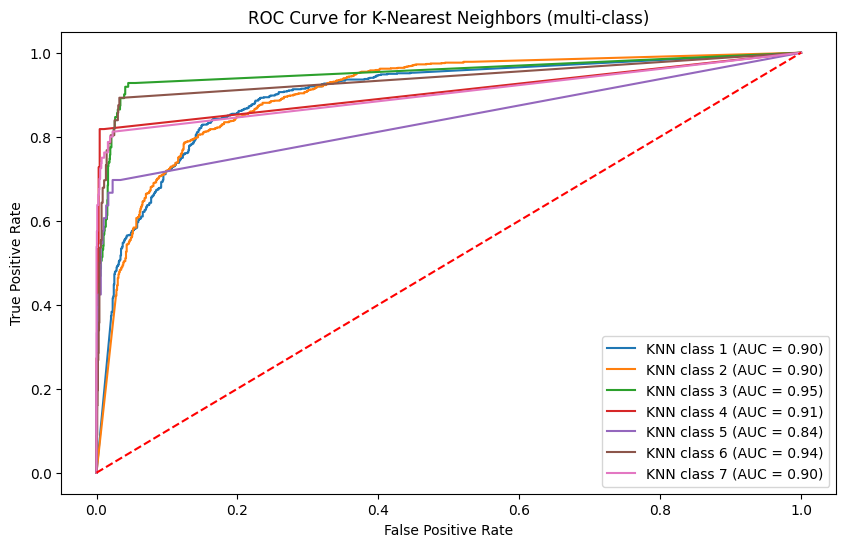

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


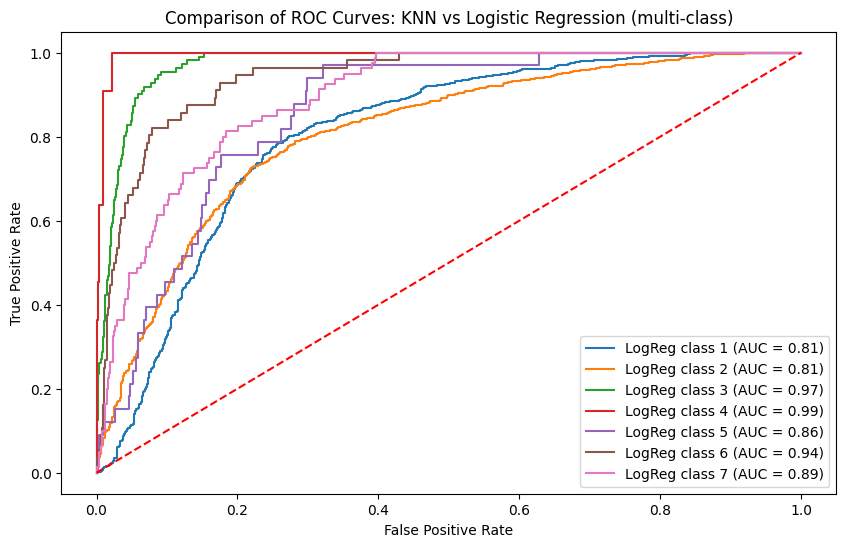

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Построение ROC-кривой для каждого класса KNN
plt.figure(figsize=(10, 6))
for i, class_label in enumerate(optimal_clf.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'KNN class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (multi-class)')
plt.legend(loc='lower right')
plt.show()

# Оценка с использованием Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Предсказание вероятностей
log_reg_pred_prob = log_reg.predict_proba(X_test)

# ROC-кривые для логистической регрессии
plt.figure(figsize=(10, 6))
for i, class_label in enumerate(log_reg.classes_):
    fpr_lr, tpr_lr, _ = roc_curve(y_test == class_label, log_reg_pred_prob[:, i])
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    plt.plot(fpr_lr, tpr_lr, label=f'LogReg class {class_label} (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves: KNN vs Logistic Regression (multi-class)')
plt.legend(loc='lower right')
plt.show()

# Вывод результатов
print(f'Best Parameters for KNN: {best_params}')
